In [28]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [29]:
# ============================
# EDA NOTEBOOK
# Retail Demand Forecasting
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)

print("Libraries imported.")


Libraries imported.


In [30]:
# Load dataset
df = pd.read_csv("Retail_Dataset2.csv")

df.head()


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [32]:
df.describe(include="all")


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
count,1.692110e+05,169211,169211,169211,169211,1.692110e+05,169211.000000,169211.000000,169211,169211.000000,169211.000000
unique,NaN,2117,4,30,289,NaN,NaN,NaN,3,NaN,NaN
top,NaN,Product_1359,Whse_J,Category_019,10/03/2016,NaN,NaN,NaN,0,NaN,NaN
freq,NaN,2607,131102,76640,1178,NaN,NaN,NaN,161447,NaN,NaN
mean,9.528887e+05,NaN,NaN,NaN,NaN,5.248118e+03,0.817742,0.395364,NaN,0.133401,87.986183
std,5.555751e+04,NaN,NaN,NaN,NaN,3.116296e+04,0.386058,0.488930,NaN,0.340009,4.909978
min,6.909430e+05,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,0.000000,80.000000
25%,9.054275e+05,NaN,NaN,NaN,NaN,2.000000e+01,1.000000,0.000000,NaN,0.000000,84.000000
50%,9.526430e+05,NaN,NaN,NaN,NaN,3.000000e+02,1.000000,0.000000,NaN,0.000000,88.000000
75%,1.001416e+06,NaN,NaN,NaN,NaN,2.000000e+03,1.000000,1.000000,NaN,0.000000,92.000000


In [33]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek

df.head()


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Year,Month,Day,DayOfWeek
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,2016,1,3,6
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,2016,1,3,6
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,2016,1,3,6
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,2016,1,3,6
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,2016,1,3,6


In [34]:
df.isnull().sum()


Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
Year                0
Month               0
Day                 0
DayOfWeek           0
dtype: int64

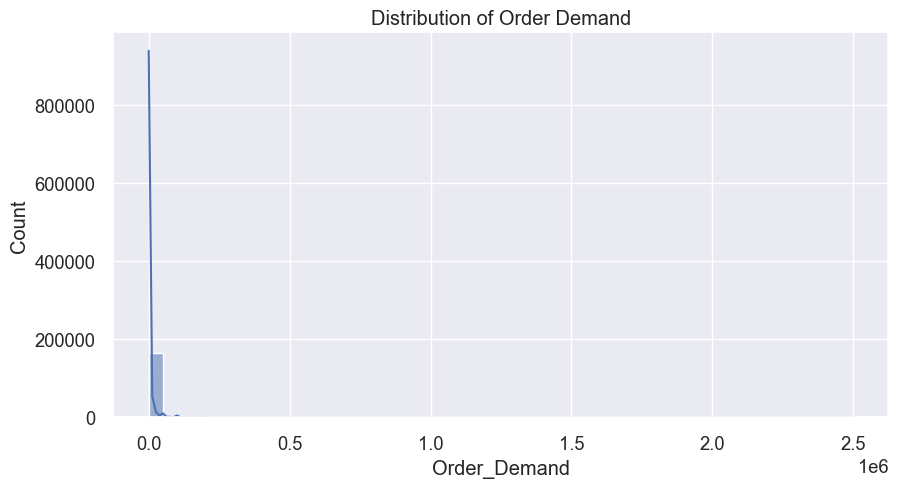

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df["Order_Demand"], bins=50, kde=True)
plt.title("Distribution of Order Demand")
plt.xlabel("Order_Demand")
plt.show()


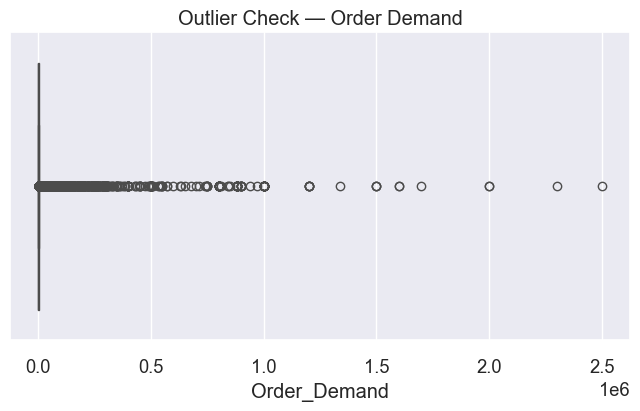

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Order_Demand"])
plt.title("Outlier Check — Order Demand")
plt.show()


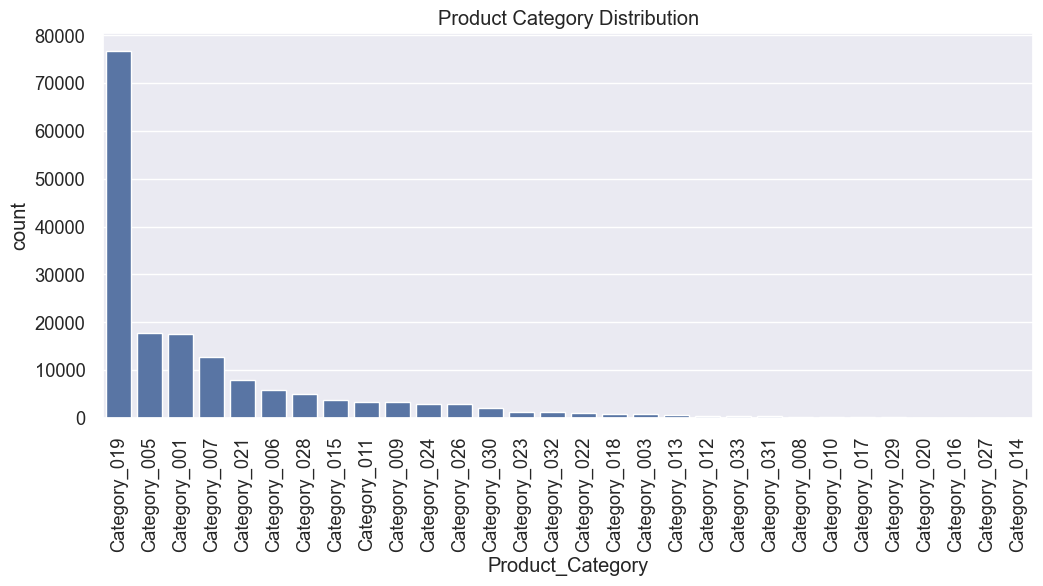

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="Product_Category", order=df["Product_Category"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Product Category Distribution")
plt.show()


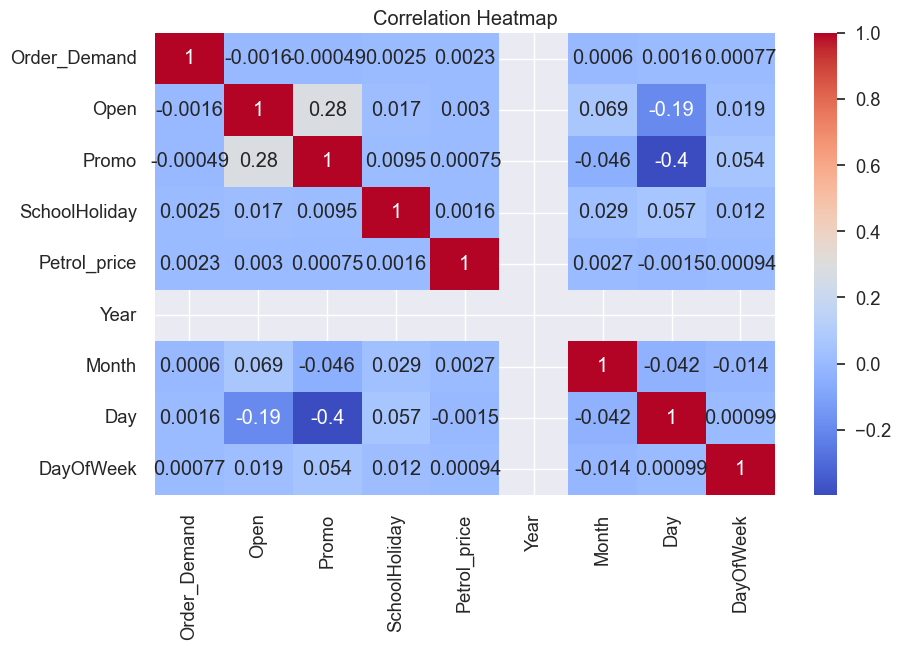

In [38]:
numerical = ["Order_Demand", "Open", "Promo", "SchoolHoliday",
             "Petrol_price", "Year", "Month", "Day", "DayOfWeek"]

plt.figure(figsize=(10,6))
sns.heatmap(df[numerical].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


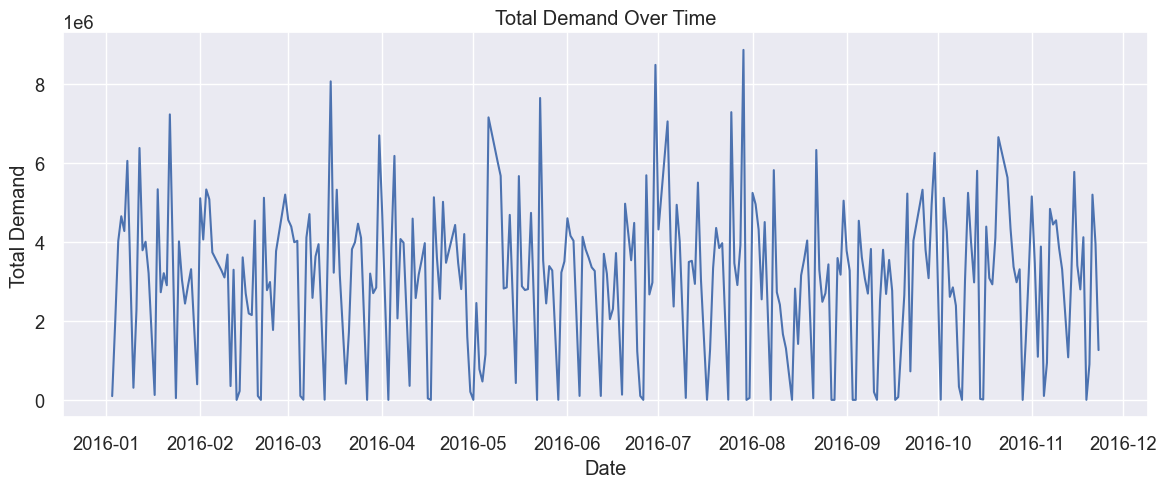

In [39]:
daily_demand = df.groupby("Date")["Order_Demand"].sum()

plt.figure(figsize=(14,5))
plt.plot(daily_demand.index, daily_demand.values)
plt.title("Total Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Total Demand")
plt.show()


In [40]:
import joblib

print("Loading trained model...")
model = joblib.load("model.pkl")
print("Model loaded.")


Loading trained model...
Model loaded.


In [41]:
# Copy dataset
df_eval = df.copy()

# IMPORTANT: Drop columns NOT used in training
df_eval = df_eval.drop(columns=["Product_id"])   # <-- FIX FEATURE MISMATCH

# Convert date to datetime
df_eval["Date"] = pd.to_datetime(df_eval["Date"])

# Extract date features (must match train.py)
df_eval["Year"] = df_eval["Date"].dt.year
df_eval["Month"] = df_eval["Date"].dt.month
df_eval["Day"] = df_eval["Date"].dt.day
df_eval["DayOfWeek"] = df_eval["Date"].dt.dayofweek

# Drop raw Date (same as training)
df_eval = df_eval.drop(columns=["Date"])

# Convert categorical columns to category dtype
cat_cols = ["Product_Code", "Warehouse", "Product_Category", "StateHoliday"]
for col in cat_cols:
    df_eval[col] = df_eval[col].astype("category")

# Target
y = df_eval["Order_Demand"]

# Features
X = df_eval.drop(columns=["Order_Demand"])

# Split (consistent with training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
model.get_booster().feature_names


['Open',
 'Promo',
 'SchoolHoliday',
 'Petrol_price',
 'Year',
 'Month',
 'Day',
 'DayOfWeek',
 'Product_Code',
 'Warehouse',
 'Product_Category',
 'StateHoliday']

In [44]:
print("X_test columns:", list(X_test.columns))
print("X_test dtypes:")
print(X_test.dtypes)


X_test columns: ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Petrol_price', 'Year', 'Month', 'Day', 'DayOfWeek', 'Product_Code', 'Warehouse', 'Product_Category']
X_test dtypes:
Open                int64
Promo               int64
StateHoliday        int32
SchoolHoliday       int64
Petrol_price        int64
Year                int32
Month               int32
Day                 int32
DayOfWeek           int32
Product_Code        int16
Warehouse            int8
Product_Category     int8
dtype: object


In [42]:
# Drop Product_id
X_test = X_test.drop(columns=["Product_id"], errors="ignore")

# Fix StateHoliday to numeric (same mapping as training)
X_test["StateHoliday"] = X_test["StateHoliday"].replace({
    '0': 0,
    0: 0,
    'a': 1,
    'b': 2
}).astype(int)

# Convert other categorical features to same encoding as training
for col in ['Product_Code', 'Warehouse', 'Product_Category']:
    X_test[col] = X_test[col].astype('category').cat.codes

# Ensure order matches
feature_order = [
    'Open',
    'Promo',
    'StateHoliday',
    'SchoolHoliday',
    'Petrol_price',
    'Year',
    'Month',
    'Day',
    'DayOfWeek',
    'Product_Code',
    'Warehouse',
    'Product_Category'
]

X_test = X_test[feature_order]

# Predict
y_pred = model.predict(X_test)
y_pred[:10]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9228\2532451595.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test["StateHoliday"] = X_test["StateHoliday"].replace({
C:\Users\Admin\AppData\Local\Temp\ipykernel_9228\2532451595.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_test["StateHoliday"] = X_test["StateHoliday"].replace({


ValueError: feature_names mismatch: ['Open', 'Promo', 'SchoolHoliday', 'Petrol_price', 'Year', 'Month', 'Day', 'DayOfWeek', 'Product_Code', 'Warehouse', 'Product_Category', 'StateHoliday'] ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Petrol_price', 'Year', 'Month', 'Day', 'DayOfWeek', 'Product_Code', 'Warehouse', 'Product_Category']